In [1]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO("runs/detect/train3/weights/best.pt")


image 1/1 /home/sumit/programming/yolo/test.jpg: 480x800 15 players, 21.5ms
Speed: 1.7ms preprocess, 21.5ms inference, 44.3ms postprocess per image at shape (1, 3, 480, 800)
Results saved to runs/detect/predict3


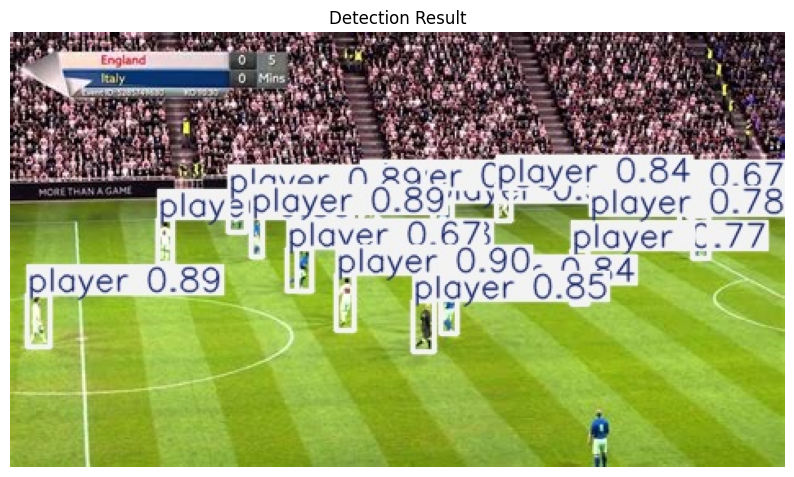

In [3]:
results = model("test.jpg", conf=0.25, save=True)

output_img_path = "runs/detect/predict/test.jpg"
img = cv2.imread(output_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Detection Result")
plt.show()

In [4]:
video_path = "test.mp4"
cap = cv2.VideoCapture(video_path)

In [5]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

output = "output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output, fourcc, fps, (frame_width, frame_height))

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cls = int(box.cls[0])
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 1)
            
            label = f"{model.names[cls]}: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    out.write(frame)
cap.release()
out.release()
print(f"Video Saved to {output}")


0: 480x800 19 players, 18.1ms
Speed: 3.2ms preprocess, 18.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 21 players, 18.1ms
Speed: 5.0ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 ball, 22 players, 18.1ms
Speed: 2.6ms preprocess, 18.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 23 players, 18.0ms
Speed: 2.8ms preprocess, 18.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 23 players, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 19 players, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 18 players, 18.0ms
Speed: 2.6ms preprocess, 18.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 19 players, 18.0ms
Speed: 1.7ms preprocess, 18.0ms inference, 0.9ms postprocess per 